In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_excel("/home/saf/Desktop/ict py/Datasets/asgnmnt/iris.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
for i in ['SL','SW','PL']:
    data[i] = data[i].fillna(data[i].median())

In [6]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'SL')

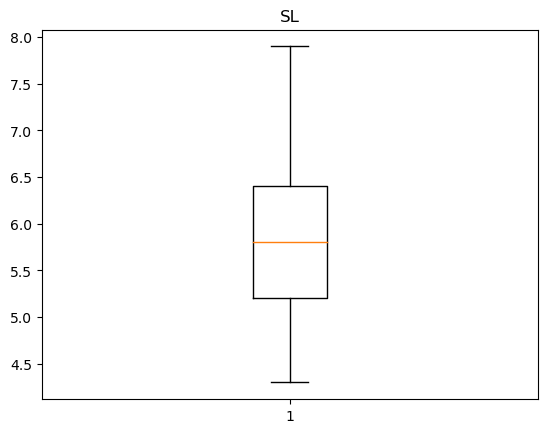

In [7]:
plt.boxplot(data['SL'])
plt.title('SL')

Text(0.5, 1.0, 'SW')

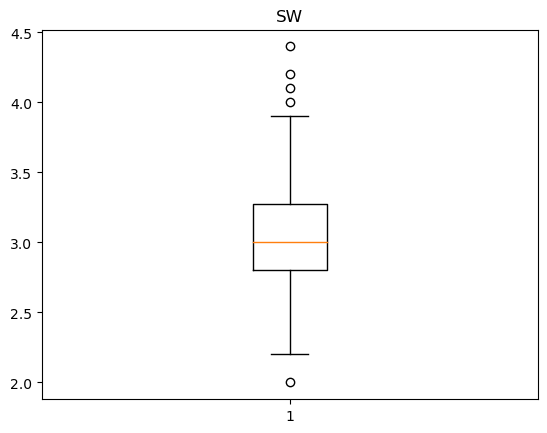

In [8]:
plt.boxplot(data['SW'])
plt.title('SW')

Text(0.5, 1.0, 'PW')

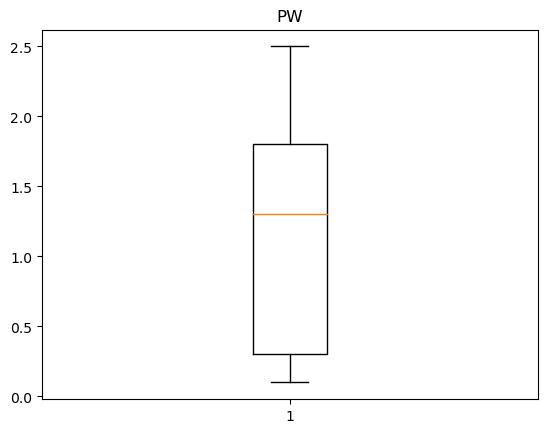

In [9]:
plt.boxplot(data['PW'])
plt.title('PW')

Text(0.5, 1.0, 'PL')

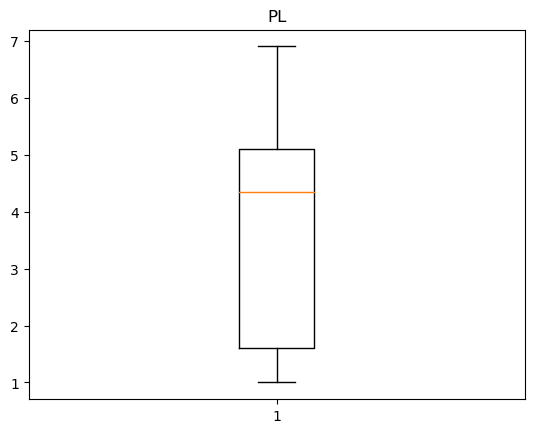

In [10]:
plt.boxplot(data['PL'])
plt.title('PL')

In [11]:
Q1=np.percentile(data['SW'],25)
Q1

2.8

In [12]:
Q2=np.percentile(data['SW'],50)
Q2

3.0

In [13]:
Q3=np.percentile(data['SW'],75)
Q3

3.275

In [14]:
IQR=Q3-Q1
IQR

0.4750000000000001

In [15]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [16]:
lower_limit

2.0874999999999995

In [17]:
upper_limit

3.9875

In [18]:
outliers=[]
for x in data['SW']:
    if x>upper_limit or x<lower_limit:
        outliers.append(x)
outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

In [19]:
ind = data['SW'] >upper_limit
data.loc[ind].index

Index([14, 15, 32, 33], dtype='int64')

In [20]:
data.drop([14, 15, 32, 33],inplace=True)

In [21]:
ind = data['SW']
data.drop([60],inplace=True)

In [22]:
data.shape

(145, 5)

Text(0.5, 1.0, 'SW')

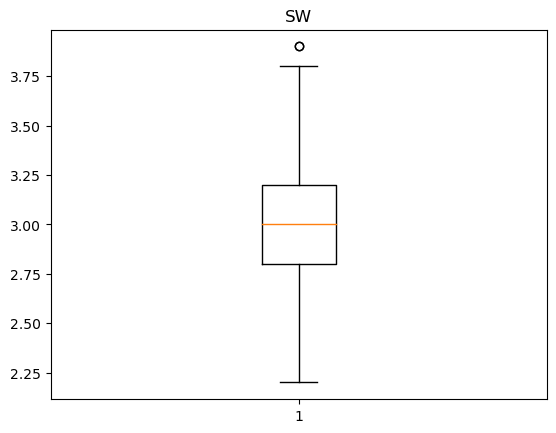

In [23]:
plt.boxplot(data['SW'])
plt.title('SW')

## Encoding the data

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Linear Regression

In [27]:
x = data.drop('Classification',axis = 1)
y = data['Classification']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
x_train,x_test,y_train,y_test = train_test_split (x,y,random_state=42,test_size=0.2)
lr = LinearRegression()
model = lr.fit(x_train,y_train)

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [31]:
y_predict = model.predict(x_test)
print("MSE Value       :",mean_squared_error(y_test,y_predict))
print("R Squared Value :",r2_score(y_test,y_predict))

MSE Value       : 0.055253654380476774
R Squared Value : 0.9193258275451719


## To Find Out Which Classification Model Gives Best Result

**1- Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

model = log_reg.fit(x_train, y_train)
y_predictions  = model.predict(x_test)

/home/saf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [37]:
print('Accuracy      : ', round(accuracy_score(y_test,y_predictions),4))
print('Precision     : ',round(precision_score(y_test,y_predictions,average='micro'),4))
print('Recall score  : ',round(recall_score(y_test,y_predictions,average='micro'),4))
print('f1 score      : ',round(f1_score(y_test,y_predictions,average='micro'),4))

Accuracy      :  0.931
Precision     :  0.931
Recall score  :  0.931
f1 score      :  0.931


**KNN**

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
x = data.drop('Classification',axis=1)
y = data['Classification']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

k_val = np.arange(3,15)
acc_val = []
for k in k_val:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(x_train, y_train)
    pred  = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred)
    acc_val.append(acc)

Text(0, 0.5, 'Accuracy')

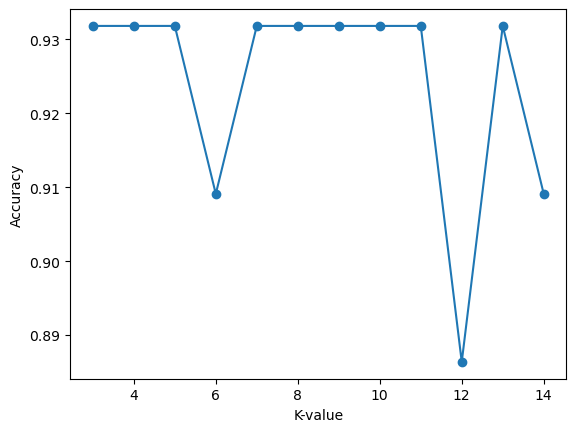

In [41]:
plt.plot(k_val,acc_val,'o-')
plt.xlabel('K-value')
plt.ylabel('Accuracy')

In [42]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski')
classifier.fit(x_train, y_train)
pred  = classifier.predict(x_test)
   

print('accuracy        : ',accuracy_score(y_test,pred))
print('Precision       : ',precision_score(y_test,pred,average='micro'))
print('Recall score    : ',recall_score(y_test,pred,average='micro'))
print('f1 score        : ',f1_score(y_test,pred,average='micro'))

accuracy        :  0.9318181818181818
Precision       :  0.9318181818181818
Recall score    :  0.9318181818181818
f1 score        :  0.9318181818181818


**Dicision Tree**

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
X = data.drop('Classification',axis=1)
y = data['Classification']

In [45]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
y_pred = dt_clf.predict(x_test)

In [47]:
print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.9090909090909091


In [48]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  4 14]]


**SVM**

In [49]:
from sklearn.svm import SVC
x = data.drop('Classification',axis=1)
y = data['Classification']

In [50]:
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [51]:
y_pred = svmclf.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.9090909090909091


In [54]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  3 15]]


**Random Forest**

In [55]:
from sklearn.ensemble import RandomForestClassifier
x = data.drop('Classification',axis=1)
y = data['Classification']

In [56]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
y_pred = rf_clf.predict(x_test)

In [58]:
print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.9318181818181818


```python
Random Forest model have the best accuracy.So it is the Best Model
```